# Tratamiento de datos

## 1. Instalación de paquetes y lectura de librerias necesarias

In [1]:
#install.packages("PerformanceAnalytics") # Quitar "#" inicial para instalar
#install.packages("zoo")

In [21]:
library(haven) # Libreria para la lectura de archivos .sav (SPSS)
library(PerformanceAnalytics) # Libreria para la representación de las correlaciones

## 2. Lectura y transformación de los datos

### 2.1. Lectura de datos

In [3]:
# Leemos los datos
datos <- as.data.frame(read_sav("./base de datos finalTRABAJO2.sav"))

# Damos formato fecha a la variable "Fecha"
datos$Fecha <- as.Date(datos$Fecha) 

#Creamos la variable "INICIATIVA"
datos$INICIATIVA <- ifelse(datos$IniciativaTitulo!="",1,0)

# Cambiamos los "NA" por ceros
datos[is.na(datos)] <- 0

Mostramos las 5 primeras filas

In [4]:
head(datos, 5)

VAR00002,NumeroIdentificativo,Fecha,Fecha2,FechaCodificada,TipoDocumento,Escrito,NoticiaTitulo,IniciativaTitulo,TemaPrincipal,...,PROMOTORGR,PROMOTORBILDU,PROMOTORPLURAL,PROMOTORVOX,PROMOTORTVE,PROMOTORCS,PROMOTORCUPETAL,SEMANA2,TEMA2,INICIATIVA
1,0,2018-01-05,13734489600,49,1,1,El legado real de Juan Carlos I,,17,...,0,0,0,0,0,0,0,1,17,0
1,0,2021-01-03,13829011200,85,1,1,[AN] La Constitución da margen para mejorar en transparencia y precisar aspectos como la inviolabilidad del Rey Las lagunas de la regulación de la Corona,,14,...,0,0,0,0,0,0,0,1,14,0
1,0,2021-01-04,13829097600,85,1,1,El banco suizo no exigió al rey emérito declarar los 65 millones de Arabia Saudí,,5,...,0,0,0,0,0,0,0,1,7,0
1,0,2021-01-05,13829184000,85,1,1,La nueva vida de Iñaki Urdangarin y familia,,1,...,0,0,0,0,0,0,0,1,1,0
1,0,2021-01-05,13829184000,85,1,1,"El Gobierno promueve transparencia en la Corona, pero sin una ley propia",,3,...,0,0,0,0,0,0,0,1,3,0


### 2.1. Dataframe DIARIO

Creamos el dataset para los datos diarios agrupados por días.

In [5]:
#Lo agregamos por días
df_diario <- aggregate(datos[,c(68,24:65)], by=list(datos$Fecha), sum)
names(df_diario)[1] <- "Fecha"

#Creamos un dataframe con las fechas para cada dÃ­a del aÃ±o
s <- as.Date("2014-01-01")
e <- as.Date("2021-03-31")

Fecha <- seq(from=s, to=e, by=1)
df_Fecha <- as.data.frame(Fecha)

#Unimos los 2 dataframes en uno solo
df_diario <- merge(df_diario, df_Fecha, all = TRUE)

# Cambiamos los "NA" por ceros
df_diario[is.na(df_diario)] <- 0

#Añadimos la semana, el mes y el año. Convertimos a númerico
df_diario$semana <- as.numeric(strftime(df_diario$Fecha, format = "%V"))
df_diario$mes <- as.numeric(strftime(df_diario$Fecha, format = "%m"))
df_diario$anyo <- as.numeric(strftime(df_diario$Fecha, format = "%Y")) 

#Corrijo las semanas finales del año
for (i in 1:length(df_diario$anyo)){
  df_diario$anyo[i] <- ifelse(df_diario$semana[i] == "53" & df_diario$mes[i] == "01", 
                              df_diario$anyo[i] <- df_diario$anyo[i] -1, 
                              df_diario$anyo[i])
}

In [6]:
#Vemos las 5 primeras filas de nuestro dataframe
head(df_diario,5)

Fecha,INICIATIVA,ELPAIS,ELMUNDO,ELCONFIDENCIAL,TEMAFAMILIASR,TEMAPOLITICAS,TEMAGOBIERNO,TEMADELITOSNFINANCI,TEMADELITOSFINANCI,...,PROMOTORGR,PROMOTORBILDU,PROMOTORPLURAL,PROMOTORVOX,PROMOTORTVE,PROMOTORCS,PROMOTORCUPETAL,semana,mes,anyo
2014-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2014
2014-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2014
2014-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2014
2014-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2014
2014-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2014


In [7]:
#Vemos las 5 últimas filas de nuestro dataframe
tail(df_diario,5)

,Fecha,INICIATIVA,ELPAIS,ELMUNDO,ELCONFIDENCIAL,TEMAFAMILIASR,TEMAPOLITICAS,TEMAGOBIERNO,TEMADELITOSNFINANCI,TEMADELITOSFINANCI,...,PROMOTORGR,PROMOTORBILDU,PROMOTORPLURAL,PROMOTORVOX,PROMOTORTVE,PROMOTORCS,PROMOTORCUPETAL,semana,mes,anyo
2643,2021-03-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,3,2021
2644,2021-03-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,3,2021
2645,2021-03-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,3,2021
2646,2021-03-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,3,2021
2647,2021-03-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,3,2021


### 2.2. Dataframe SEMANAL

Creamos el dataset para los datos semanales agrupados por días.

In [8]:
#Lo agregamos por semana y aÃ±o
df_semanal <- aggregate(df_diario[,c(2:44)], by=list(df_diario$semana, df_diario$anyo), sum)

#Renombramos
names(df_semanal)[1] <- "semana"
names(df_semanal)[2] <- "anyo"

#Ordenamos las columnas y las filas
df_semanal <- df_semanal[,c(2,1,3:45)]
df_semanal <- df_semanal[order(df_semanal$anyo, df_semanal$semana),]

In [9]:
#Vemos las 10 primeras filas de nuestro dataframe
head(df_semanal,10)

anyo,semana,INICIATIVA,ELPAIS,ELMUNDO,ELCONFIDENCIAL,TEMAFAMILIASR,TEMAPOLITICAS,TEMAGOBIERNO,TEMADELITOSNFINANCI,...,PROMOTORPP,PROMOTORMIXTO,PROMOTOROTROS,PROMOTORGR,PROMOTORBILDU,PROMOTORPLURAL,PROMOTORVOX,PROMOTORTVE,PROMOTORCS,PROMOTORCUPETAL
2014,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dataframe MENSUAL

Creamos el dataset para los datos diarios agrupados por días.

In [10]:
df_mensual <- df_diario[,c(1:44)]
df_mensual$mes <- as.numeric(strftime(df_mensual$Fecha, format = "%m"))
df_mensual$anyo <- as.numeric(strftime(df_mensual$Fecha, format = "%Y")) 

#Lo agregamos por mes y aÃ±o
df_mensual <- aggregate(df_mensual[,c(2:44)], by=list(df_mensual$mes, df_mensual$anyo), sum)

#Renombramos
names(df_mensual)[1] <- "mes"
names(df_mensual)[2] <- "anyo"

#Ordenamos las columnas y las filas
df_mensual <- df_mensual[,c(2,1,3:45)]
df_mensual <- df_mensual[order(df_mensual$anyo, df_mensual$mes),]

In [11]:
#Vemos las 10 primeras filas de nuestro dataframe
head(df_mensual,10)

anyo,mes,INICIATIVA,ELPAIS,ELMUNDO,ELCONFIDENCIAL,TEMAFAMILIASR,TEMAPOLITICAS,TEMAGOBIERNO,TEMADELITOSNFINANCI,...,PROMOTORPP,PROMOTORMIXTO,PROMOTOROTROS,PROMOTORGR,PROMOTORBILDU,PROMOTORPLURAL,PROMOTORVOX,PROMOTORTVE,PROMOTORCS,PROMOTORCUPETAL
2014,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,7,0,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,8,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,9,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,10,0,2,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Correlaciones

### 3.1. Correlaciones diarias

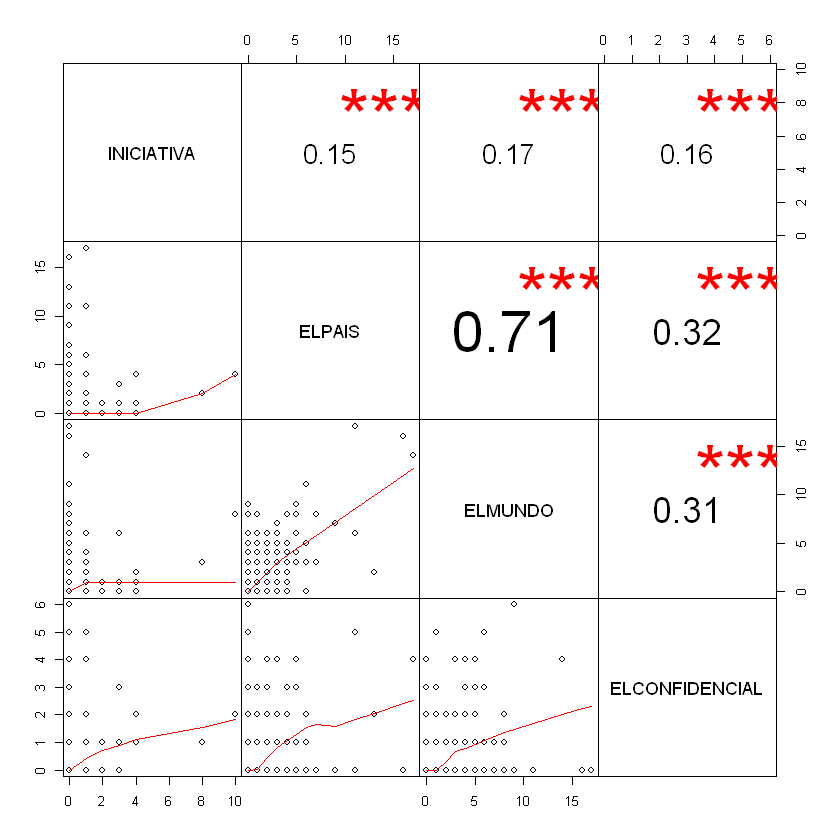

In [12]:
chart.Correlation(as.matrix(df_diario[,2:5]), main = "Matriz de correlaciones", histogram = FALSE, pch=1)

### 3.2. Correlaciones semanales

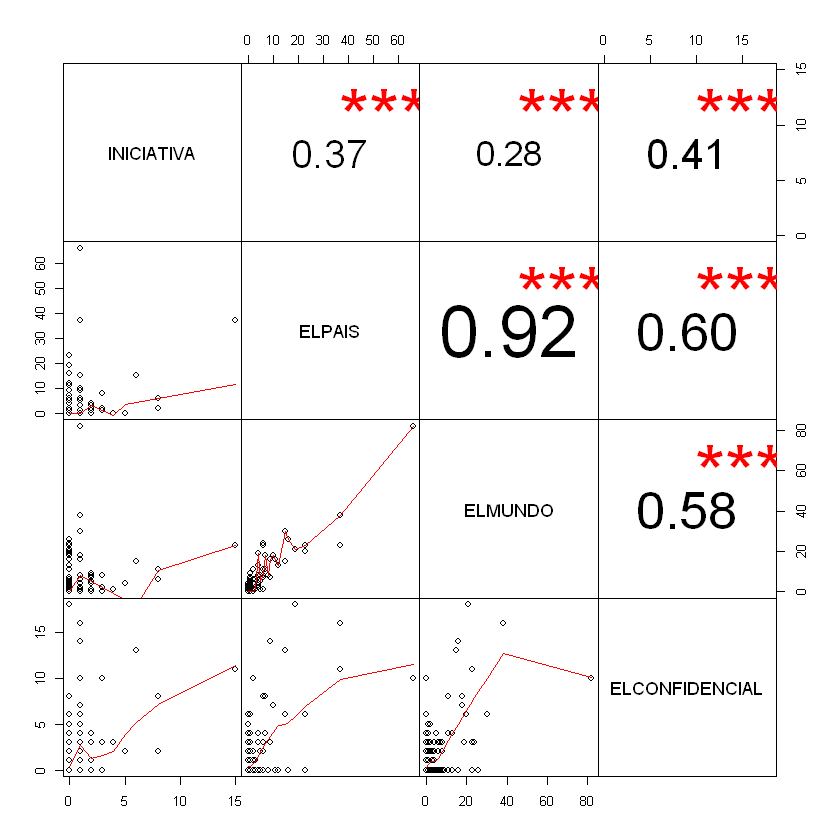

In [13]:
chart.Correlation(as.matrix(df_semanal[,3:6]), main = "Matriz de correlaciones", histogram = FALSE, pch=1)

### 3.3. Correlaciones mensuales

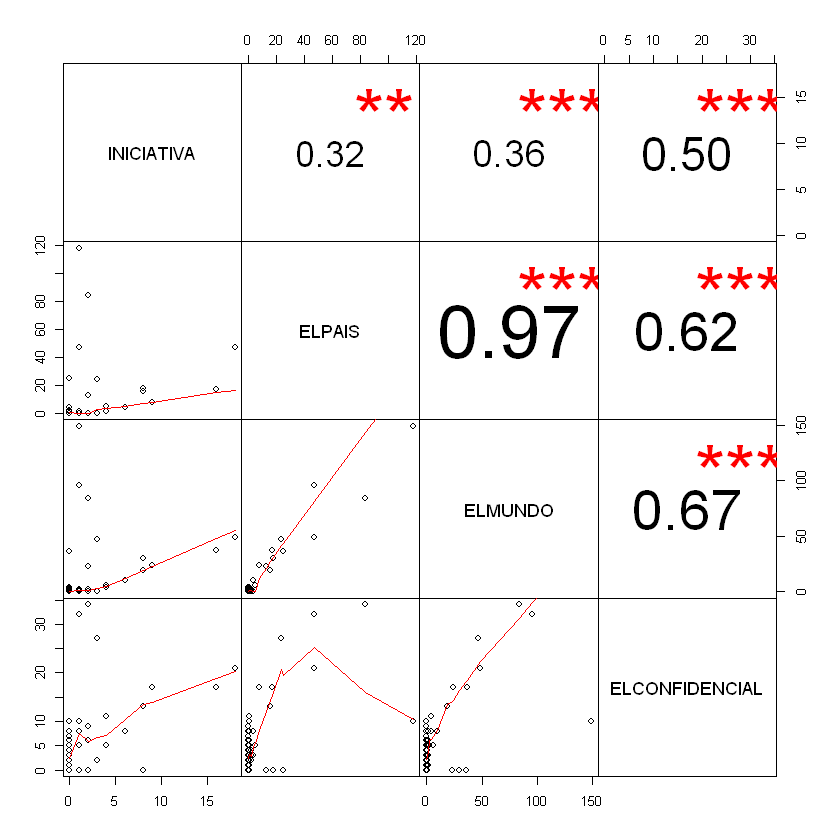

In [14]:
chart.Correlation(as.matrix(df_mensual[,3:6]), main = "Matriz de correlaciones", histogram = FALSE, pch=1)

## 4. Series temporales

### 4.1. Series diarias

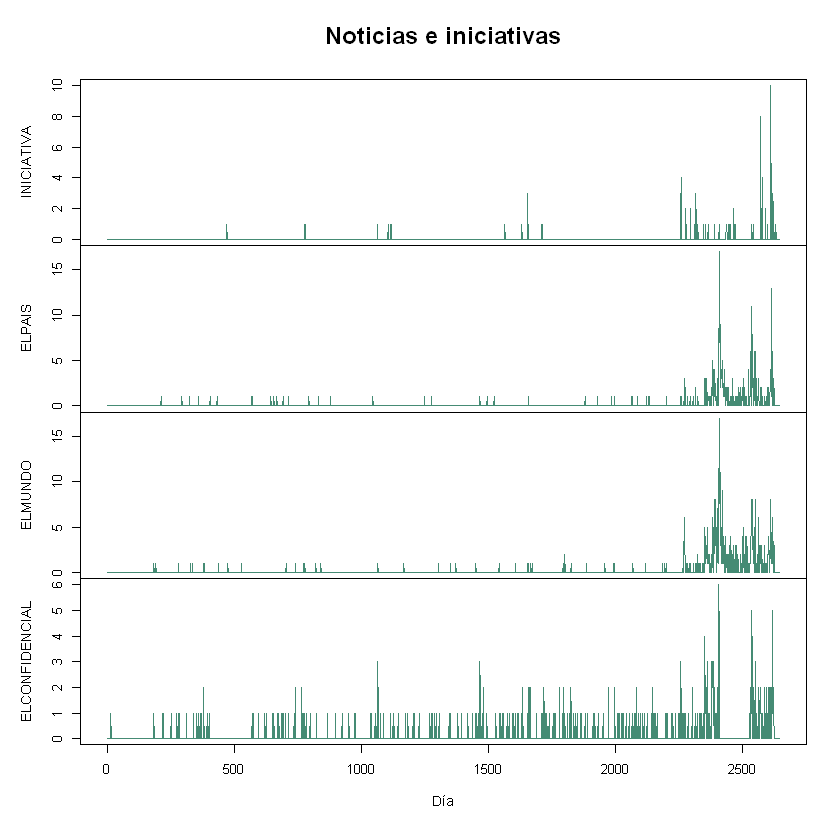

In [15]:
#Convertimos nuestro dataframe en una serie temporal
ts_diario=ts(df_diario[,c(2:5)],freq=1,start=c(1,1))

# Vemos su representaciÃ³n grÃ¡fica
plot(ts_diario, col = "aquamarine4",xlim = c(0, 100, 10), xlab = "Día", lwd = 1, cex.lab = 0.7, main="Noticias e iniciativas", sub = "Semana")


### 4.2. Series semanales

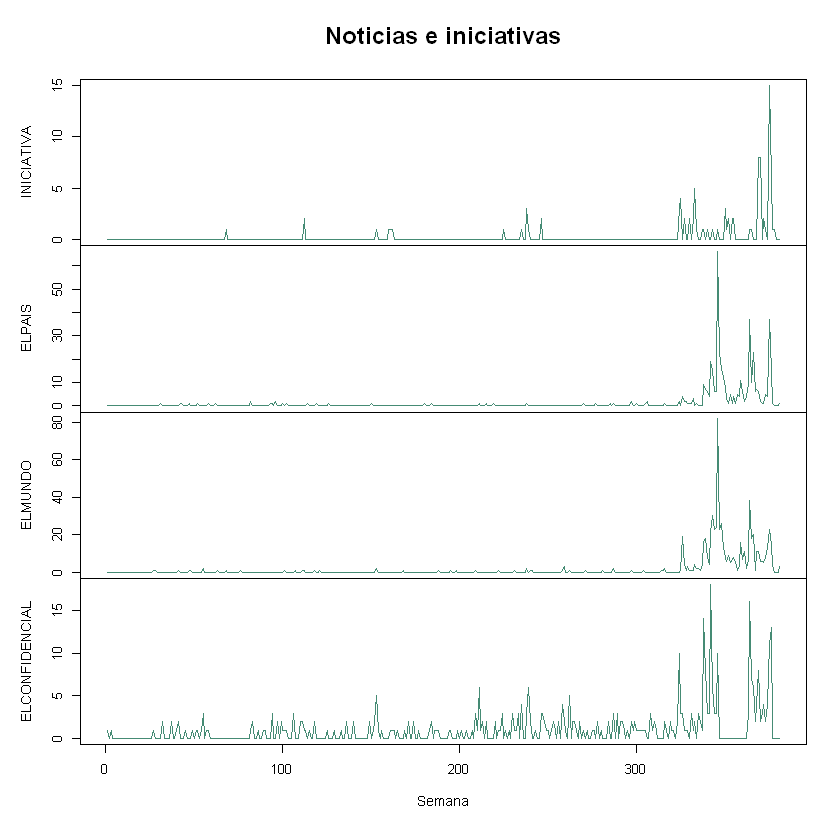

In [16]:
#Convertimos nuestro dataframe en una serie temporal
ts_semanal=ts(df_semanal[,c(3:6)],freq=1,start=c(1,1))

# Vemos su representación gráfica
plot(ts_semanal, col = "aquamarine4",xlim = c(0, 400, 10),  
     xlab = "Semana", lwd = 1, cex.lab = 0.7, main="Noticias e iniciativas", sub = "Semana")

### 4.3. Series mensuales

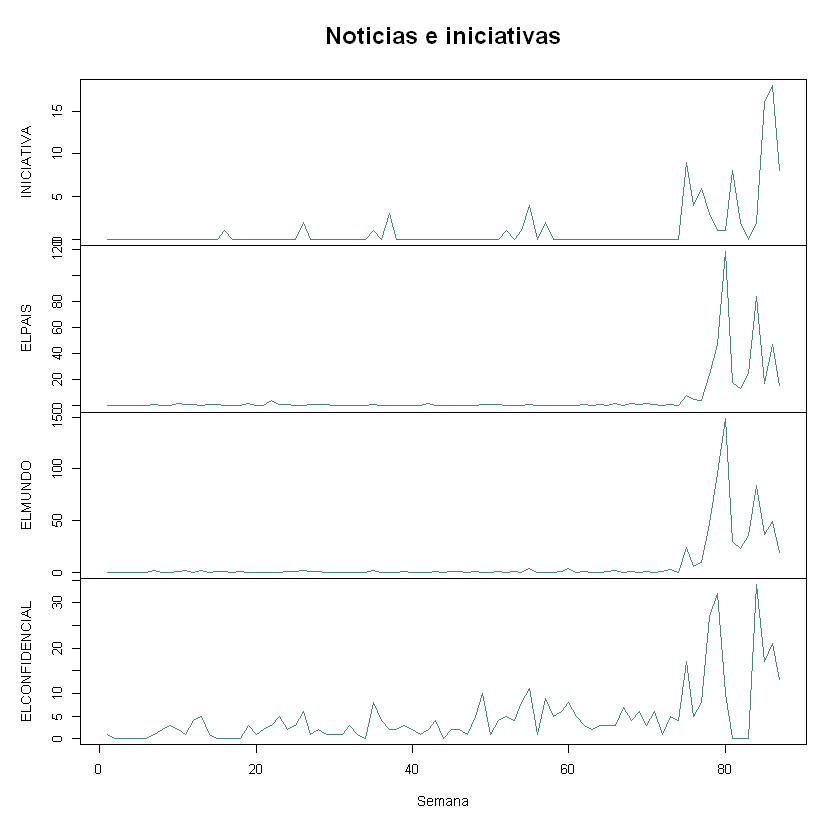

In [17]:
#Convertimos nuestro dataframe en una serie temporal
ts_mensual=ts(df_mensual[,c(3:6)],freq=1,start=c(1,1))

# Vemos su representaciÃ³n grÃ¡fica
plot(ts_mensual, col = "aquamarine4",xlim = c(0, 100, 10), xlab = "Semana", lwd = 1, cex.lab = 0.7, main="Noticias e iniciativas", sub = "Semana")


## 5. Correlaciones cruzadas

### 5.1. Correlaciones cruzadas diarias

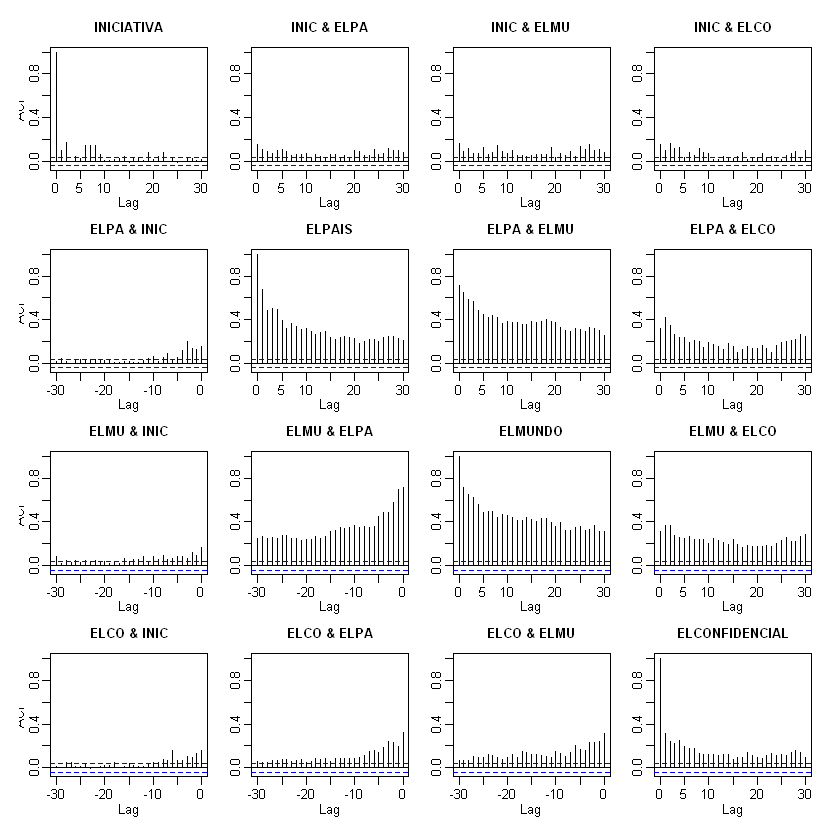

In [18]:
acf(ts_diario,lag.max=30)

### 5.2. Correlaciones cruzadas semanales

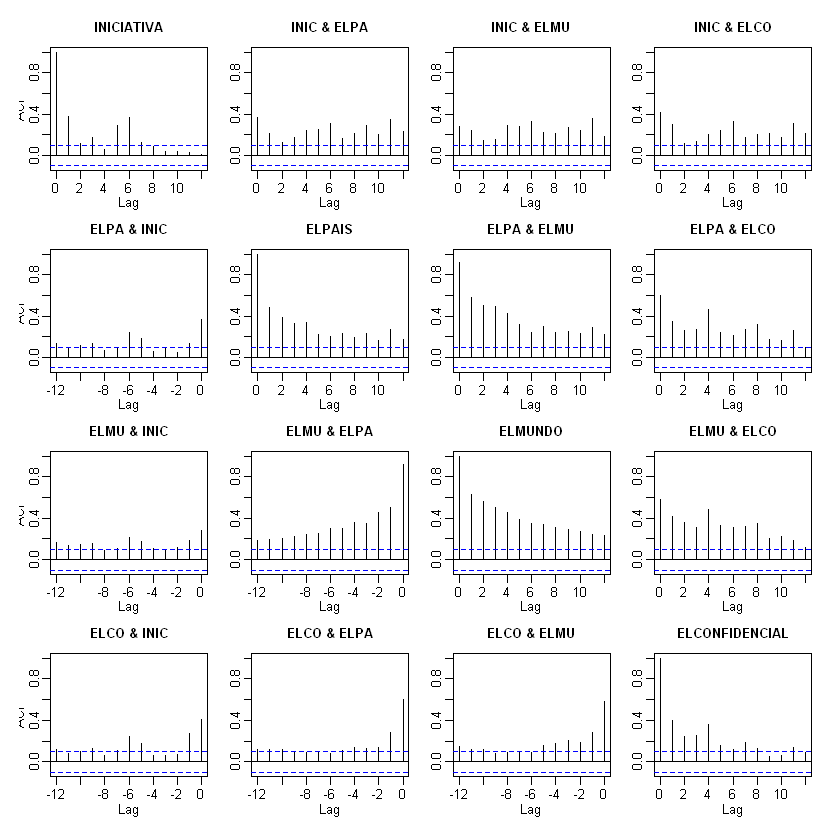

In [19]:
acf(ts_semanal,lag.max=12)

### 5.3. Correlaciones cruzadas mensuales

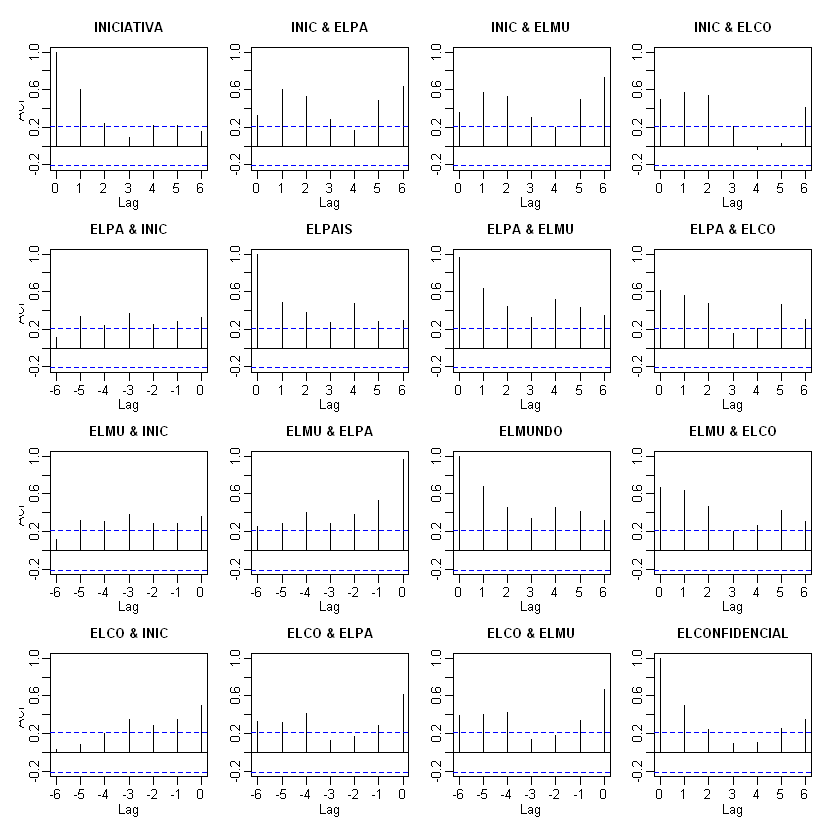

In [20]:
acf(ts_mensual,lag.max=6)